# 자연영상인식 1에서 생성한 cnn1.h5파일을 업로드 시켜줘야 함

In [55]:
# 학습된 모델 불러서 다시 사용
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [56]:
# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어옴

In [57]:
cnn = tf.keras.models.load_model("/content/cnn1.h5")
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [58]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [59]:
# 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=2)
res

313/313 - 1s - loss: 0.6102 - accuracy: 0.8042 - 1s/epoch - 3ms/step


[0.6101905107498169, 0.8041999936103821]

In [60]:
from tensorflow.python.framework.ops import name_scope_v1
cnn.layers[0].name

'conv2d'

In [61]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()
    print(layer.name, kernel.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [62]:
# 맨 앞에 있는 컨볼루션층의 커널 정보를 추출
kernel, biases = cnn.layers[0].get_weights()

In [63]:
minv, maxv = kernel.min(), kernel.max()

In [64]:
# 커널의 값을 표준화 minmax scaler
kernel = (kernel - minv) / (maxv - minv)
kernel

array([[[[0.26863536, 0.65353256, 0.65093535, 0.6584355 , 0.3555417 ,
          0.4404684 , 0.7190416 , 0.43013084, 0.31312943, 0.2604658 ,
          0.49861354, 0.25086397, 0.3711986 , 0.64373827, 0.23191698,
          0.23592924, 0.7634359 , 0.38608938, 0.7941822 , 0.56385034,
          0.6397075 , 0.3392813 , 0.8280035 , 0.22123107, 0.64922374,
          0.7520584 , 0.980086  , 0.5657931 , 0.30031866, 0.24891289,
          0.7105437 , 0.5554346 ],
         [0.23607562, 0.6787068 , 0.36265993, 0.6824552 , 0.33974597,
          0.6292773 , 0.6750987 , 0.6906115 , 0.24397163, 0.66536474,
          0.33162567, 0.57414705, 0.609251  , 0.28308645, 0.3635225 ,
          0.33477098, 0.59664625, 0.35677022, 0.70620036, 0.50669897,
          0.5333048 , 0.27196872, 0.7755575 , 0.6810955 , 0.45273668,
          0.55457556, 0.43383226, 0.70575005, 0.46799496, 0.6163366 ,
          0.51472205, 0.55129147],
         [0.19137332, 0.5275195 , 0.42613572, 0.61394197, 0.53281575,
          0.29849762

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
kernel.shape

(3, 3, 3, 32)

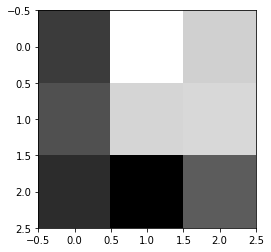

In [67]:
temp = kernel[:,:,:,0]
temp = temp[:,:,0]
plt.imshow(temp,cmap = 'gray')

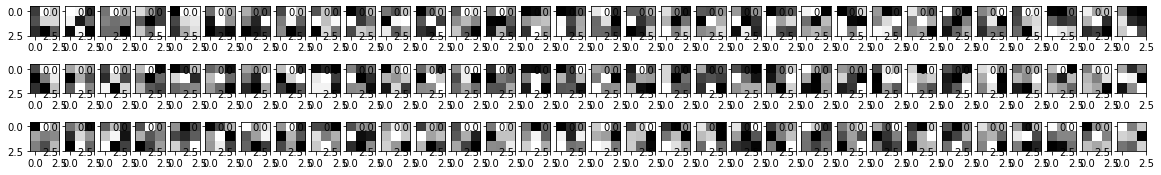

In [68]:
from tensorflow.python.ops.gen_array_ops import rank_eager_fallback
# (3,3,3,32)

plt.figure(figsize=(20,3))
for i in range(32):
  f = kernel[:,:,:,i]
  for j in range(3):
    plt.subplot(3,32,j*32+i+1)
    temp = f[:,:,j]
    plt.imshow(temp,cmap = 'gray')

In [69]:
# 신경망의 특징 맵을 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)


In [70]:
# 0번째 층을 따로 떼어내서 객체에 저장
from tensorflow.keras.models import Model

In [71]:
m =  Model(inputs = cnn.inputs, outputs=cnn.layers[0].output)
m.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [72]:
feature_map = m.predict(x_test)

313/313 [==============================] - 0s 1ms/step


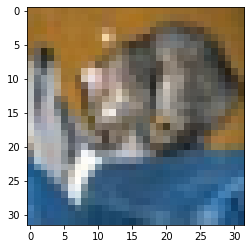

In [73]:
fm = feature_map[0]
plt.imshow(x_test[0])

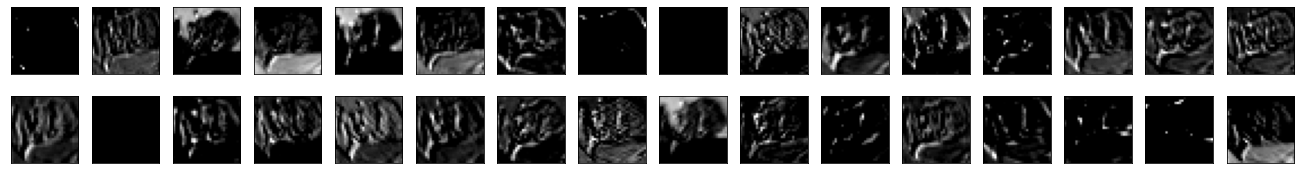

In [74]:
plt.figure(figsize = (23,3))
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([]) # x축 삭제
  plt.yticks([]) # y축 삭제

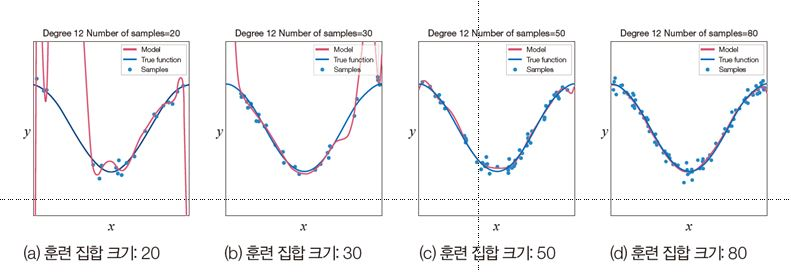

In [75]:
# 딥러닝의 전략
# 충분히 큰 신경망 구조를 사용하되 다양한 규제 기법을 적용하여 과잉 적합을 방지
# 데이터 증대, 드랍아웃, 가중치 감쇠, 앙상블, 배치 정규화등의 다양한 규제 기법이 있음
from IPython import display
display.Image("/content/033.JPG")

In [76]:
# 데이터를 늘리는 행위는 비용증가
# 딥러닝에서는 주어진 데이터를 인위적으로 늘리는 데이터 증대(data augmentation)를 적용
# 영상을 이동, 회전, 또는 좌우반전
# 명암 조정등
# 텐서플로에서 제공하는 라이브러리를 이용

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
xx_train, yy_train = x_train[:12], y_train[:12]

In [79]:
xx_train.shape, yy_train.shape

((12, 32, 32, 3), (12, 10))

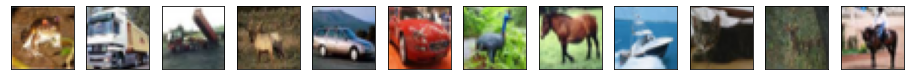

In [80]:
plt.figure(figsize=(16,2))
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(xx_train[i])
  plt.xticks([])
  plt.yticks([])

In [81]:
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [82]:
gen = generator.flow(xx_train,yy_train, batch_size = 6)

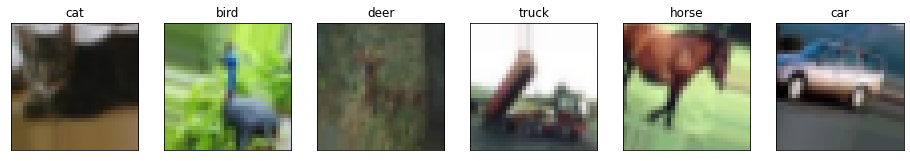

In [83]:
cls_name = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
img, label = gen.next() # 함수를 호출할 때 마다 batch_size 매개변수가 지정한 수 만큼 영상 생성
plt.figure(figsize=(16,3))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(img[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(cls_name[np.argmax(label[i])])   

In [84]:
# 증대된 영상으로 신경망 학습

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops.math_ops import Max
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# 데이터 로드
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [87]:
# 신경망 설계 ccp d f(flatten) fc d fc
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [88]:
cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])
batch_size = 128
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
hist = cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_size),epochs=10,validation_data=(x_test,y_test),verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


391/391 - 26s - loss: 1.8648 - accuracy: 0.3026 - val_loss: 1.5318 - val_accuracy: 0.4550 - 26s/epoch - 66ms/step
Epoch 2/10
391/391 - 24s - loss: 1.5750 - accuracy: 0.4218 - val_loss: 1.3556 - val_accuracy: 0.5135 - 24s/epoch - 60ms/step
Epoch 3/10
391/391 - 24s - loss: 1.4402 - accuracy: 0.4781 - val_loss: 1.2313 - val_accuracy: 0.5523 - 24s/epoch - 60ms/step
Epoch 4/10
391/391 - 24s - loss: 1.3670 - accuracy: 0.5112 - val_loss: 1.1988 - val_accuracy: 0.5709 - 24s/epoch - 62ms/step
Epoch 5/10
391/391 - 24s - loss: 1.3149 - accuracy: 0.5273 - val_loss: 1.1221 - val_accuracy: 0.5952 - 24s/epoch - 61ms/step
Epoch 6/10
391/391 - 24s - loss: 1.2701 - accuracy: 0.5459 - val_loss: 1.1723 - val_accuracy: 0.5731 - 24s/epoch - 61ms/step
Epoch 7/10
391/391 - 23s - loss: 1.2275 - accuracy: 0.5628 - val_loss: 1.1515 - val_accuracy: 0.5971 - 23s/epoch - 59ms/step
Epoch 8/10
391/391 - 23s - loss: 1.2034 - accuracy: 0.5702 - val_loss: 1.0390 - val_accuracy: 0.6279 - 23s/epoch - 59ms/step
Epoch 9/10


In [89]:
#신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
res
# 이전에 했던 데이터를 증대시키지 않았던 모델에 비해 성능이 향상된 것을 확인

[0.9997652173042297, 0.6414999961853027]

In [90]:
# 정확률 , 손실함수 그래프 
# -- 이전 코드 참조

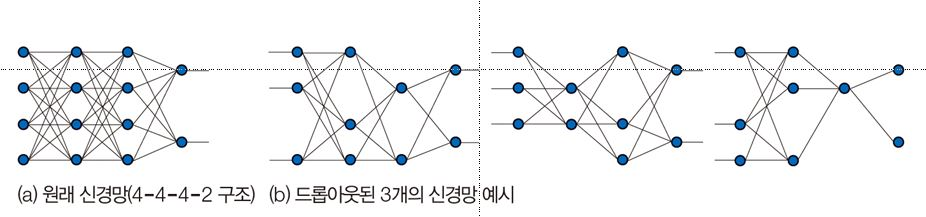

In [91]:
# 드랍아웃 - 규제 기법
# 일정비율의 가중치를 불능으로 만들고 학습 , 
# 불능이되는 에지는 샘플마다 독립적으로 정하는데. 난수를 이용해서 랜덤하게 선택
from IPython import display
display.Image('/content/034.JPG')

In [92]:
# 드랍아웃  
# 드랍아웃의 성능 향상을 측정하는 프로그램
# 교차검증을 적용해서 실험결과의 신뢰성을 높임

In [93]:
# 라이브러리 로드
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

In [94]:
#데이터 로드
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [95]:
#하이퍼 매개변수  설정
batch_size = 128
n_epoch = 10
k=2 #

In [96]:
from re import VERBOSE
from tensorflow.python.ops.batch_ops import batch
from pyparsing import actions
# 드랍아웃의 비율에 따라 교차검증을 수행하고 정확율을 반환하는 함수
def cross_validation(dropout_rate:list):
  accuracy = [] 
  for train_index, val_index in  KFold(k).split(x_train):
    #훈련과 검증으로 분할
    xtrain, xval =  x_train[train_index], x_train[val_index]
    ytrain, yval =  y_train[train_index], y_train[val_index]
    #신경망 모델 설계
    cnn = Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu', input_shape = (32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))

    cnn.add(Flatten())

    cnn.add(Dense(512,activation = 'relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation = 'softmax'))

    # 신경망 모델을 학습하고 평가
    cnn.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer = Adam(), metrics = ['accuracy'])
    cnn.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epoch,verbose=0)
    accuracy.append( cnn.evaluate(xval,yval,verbose=0)[1])
  return accuracy

In [97]:
cnn_widthout_drop = cross_validation([0.0,0.0,0.0])
cnn_width_drop = cross_validation([0.25,0.25,0.5])

In [98]:
np.mean(cnn_widthout_drop), np.mean(cnn_width_drop)

(0.6925399899482727, 0.7017599940299988)

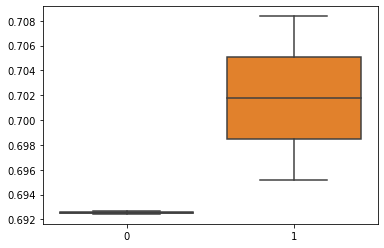

In [99]:
import seaborn as sns
sns.boxplot(data=[cnn_widthout_drop,cnn_width_drop])

In [100]:
# 과잉적합에서는 가중치 값이 아주큰 현상
# 가중치 감소.. 이것은 성능을 유지한 채로 가중치를 크게 낮추는 규제
# 세가지 매개변수
# 가중치, Kernel_regularize
# 바이어스,  Bias regularize
# 활성함수 결과에 적용 Activity_regularizer
# from tensorflow.keras import regularizers
# cnn.add(Dense(64,kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
# L1 규제 : L1규제는 손실 함수에 가중치의 절대값인 L1 노름(norm)을 추가 한다
# L2 규제는 손실 함수에 가중치에 대한 L2 노름(norm)의 제곱을 더한다.

In [101]:
# 성능평가
# 하이퍼매개변수를 최적화 나 모델선택이 중요
# 객관적인 평가
# 1. 교차검증
# 2. 제거 조사 ablation study
#   선택사항이 여러개 있을때 선택사항을 하나씩 빼고 성능을 측정해서 선택사항의 각각의 기여도를 평가

In [102]:
# 3가지 옵션에 대해서 제거조사.. 교차검증으로 제거 조사에 대한 결과에  신뢰성을 높임

In [103]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

In [104]:
# CIFAR-10데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) =  cifar10.load_data()
x_train = x_train.astype(np.float16)/255.0
x_test = x_test.astype(np.float16)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [105]:
#하이퍼매개변수
batch_size=128
n_epoch = 10
k = 5

In [106]:
# 하이퍼 매개변수에 따라서 교차검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
  accuracy = [] 
  for train_index, val_index in  KFold(k).split(x_train):
    #훈련과 검증으로 분할
    xtrain, xval =  x_train[train_index], x_train[val_index]
    ytrain, yval =  y_train[train_index], y_train[val_index]
    #신경망 모델 설계
    cnn = Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu', input_shape = (32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))

    cnn.add(Flatten())

    cnn.add(Dense(512,activation = 'relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation = 'softmax',kernel_regularizer=regularizers.l2(l2_reg)) )

    # 신경망 모델을 학습하고 평가
    cnn.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer = Adam(), metrics = ['accuracy'])
    if data_gen:
      generator = ImageDataGenerator()
      cnn.fit_generator(generator.flow(x_train,y_train,batch_size = batch_size)
        ,epochs=n_epoch,validation_data=(x_test,y_test), verbose=2 )
    else:
      cnn.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epoch,validation_data=(x_test,y_test), verbose=2 )
      
    accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
  return accuracy

In [ ]:
# 오래걸림...
cnn_000 = cross_validation(False,[0.0,0.0,0.0],0.0)
cnn_001 = cross_validation(False,[0.0,0.0,0.0],0.01)
cnn_010 = cross_validation(False,[0.25,0.25,0.5],0.0)
cnn_011 = cross_validation(False,[0.25,0.25,0.5],0.01)
cnn_100 = cross_validation(True,[0.0,0.0,0.0],0.0)
cnn_101 = cross_validation(True,[0.0,0.0,0.0],0.01)
cnn_110 = cross_validation(True,[0.25,0.25,0.5],0.0)
cnn_111 = cross_validation(True,[0.25,0.25,0.5],0.01)

In [ ]:
print(np.array(cnn_000).mean())
print(np.array(cnn_001).mean())
print(np.array(cnn_010).mean())
print(np.array(cnn_011).mean())
print(np.array(cnn_100).mean())
print(np.array(cnn_101).mean())
print(np.array(cnn_111).mean())

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(data = [cnn_001,cnn_010,cnn_011,cnn_100,cnn_101,cnn_111])
# plt.boxplot(data = [cnn_001,cnn_010,cnn_011,cnn_100,cnn_101,cnn_111])

In [ ]:
# 세션 유지하는 방법
# F12번 키를 누르고 
#콘솔창에서 아래 코드를 입력하고 엔터

function ClickConnect() {
    var buttons = document.querySelectorAll("colab-dialog.yes-no-dialog paper-button#cancel"); 
    buttons.forEach(function(btn) { 
        btn.click(); 
    }); 
    console.log("1분마다 자동 재연결"); 
    document.querySelector("colab-toolbar-button#connect").click(); 
} 
setInterval(ClickConnect,1000*60);